# Projeto DL 2021 - Grupo Stonks

In [2]:
# !pip install --upgrade tensorflow keras Pillow
# !pip install SciPy

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

2021-10-29 01:47:56.070310: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-29 01:47:56.070339: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
tf.__version__

'2.6.0'

## Parte 1 - Processamento dos dados

### Processar o Training set

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('img/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 80 images belonging to 4 classes.


### Processar o Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('img/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 20 images belonging to 4 classes.


## Parte 2 - Criação do CNN

In [7]:
cnn = tf.keras.models.Sequential()

2021-10-29 01:47:57.560618: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-29 01:47:57.560702: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-29 01:47:57.560773: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lucas-tkp): /proc/driver/nvidia/version does not exist
2021-10-29 01:47:57.561310: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Passo 1 - Convolução e agrupamento

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Passo 2 - Adicionar segunda e terceira camada de convolução

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Passo 3 - Redimensionar as camadas

In [11]:
cnn.add(tf.keras.layers.Flatten())

### Passo 4 - Conectar todas as camadas

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='tanh'))
cnn.add(tf.keras.layers.Dropout(0.1))
cnn.add(tf.keras.layers.Dense(units=128, activation='tanh'))
cnn.add(tf.keras.layers.Dropout(0.1))

### Passo 5 - Camadas de saída

In [13]:
cnn.add(tf.keras.layers.Dense(units=4, activation='sigmoid'))

## Parte 3 - Treinamento do CNN

### Passo 1 - Compilar o CNN

In [14]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Passo 2 - Treinar o CNN no Training set e comparar com o Test set

In [15]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 40)

2021-10-29 01:48:02.130830: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
3/3 [==============================] - 9s 3s/step - loss: 1.5462 - accuracy: 0.1875 - val_loss: 1.3945 - val_accuracy: 0.2500
Epoch 2/40
3/3 [==============================] - 7s 2s/step - loss: 1.4083 - accuracy: 0.2125 - val_loss: 1.4000 - val_accuracy: 0.2500
Epoch 3/40
3/3 [==============================] - 7s 2s/step - loss: 1.3989 - accuracy: 0.2875 - val_loss: 1.3855 - val_accuracy: 0.4500
Epoch 4/40
3/3 [==============================] - 7s 2s/step - loss: 1.3888 - accuracy: 0.2375 - val_loss: 1.3804 - val_accuracy: 0.3500
Epoch 5/40
3/3 [==============================] - 7s 3s/step - loss: 1.3783 - accuracy: 0.3875 - val_loss: 1.3795 - val_accuracy: 0.2500
Epoch 6/40
3/3 [==============================] - 7s 3s/step - loss: 1.3747 - accuracy: 0.2875 - val_loss: 1.3748 - val_accuracy: 0.4000
Epoch 7/40
3/3 [==============================] - 7s 2s/step - loss: 1.3764 - accuracy: 0.3250 - val_loss: 1.3719 - val_accuracy: 0.3500
Epoch 8/40
3/3 [=========================

## Matriz de confusão

In [16]:
#!pip install sklearn
#!pip install matplotlib

/home/iuri/.local/lib/python3.9/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


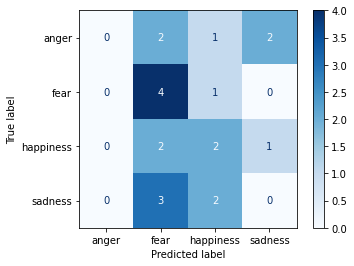

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


Y_pred = cnn.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ["anger", "fear", "happiness", "sadness"]

cm = confusion_matrix(test_set.classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

## Part 4 - Making a single prediction

In [18]:
import numpy as np
from keras.preprocessing import image
percent = 0.8
emotions = {0: 'anger', 1: 'fear', 2: 'happiness', 3: 'sadness'}
test_image = image.load_img('img/single_prediction/raiva.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
max_value = max(result[0]) 
max_index = np.where(result[0] == max_value)
if max_value > percent:
    prediction = emotions[max_index[0][0]]
else:
    prediction = 'Não identificado'

In [19]:
prediction

'fear'

In [20]:
max_value

0.99279296

## Fim?

## Melhorando modelo

In [21]:
# !pip install --upgrade pip
# !pip install --upgrade tensorflow keras Pillow
# !pip install SciPy
# !pip install sklearn
# !pip install matplotlib

### Processando Dados

In [22]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('img/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 80,
                                                 class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('img/test_set',
                                            target_size = (64, 64),
                                            batch_size = 1,
                                            class_mode = 'categorical')

Found 80 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [ ]:
augmented_imgs_dataset = ([])
augmented_labels = ([])
j = 0
for j in range(3):
    print("j:", j)
    i = 0
    for image in training_set:
        print("i:", i)
        augm_img = image[0][i]
        label = image[1][i]
        augmented_imgs_dataset.append(augm_img)
        augmented_labels.append(label)
        
        i+=1
        if i > 79:
            break
    j += 1
    if j > 2:
        break

In [33]:
dic = { 0 : "anger", 1 : "fear", 2 : "happiness", 3 : "sadness"}
new_labels = ([])
for arr in augmented_labels:
    for i in range(len(arr)):
        if(arr[i] == 1):
            new_labels.append(dic[i])
            break
print(new_labels)

['sadness', 'happiness', 'sadness', 'happiness', 'happiness', 'happiness', 'fear', 'sadness', 'anger', 'happiness', 'fear', 'anger', 'sadness', 'fear', 'sadness', 'fear', 'happiness', 'fear', 'sadness', 'fear', 'happiness', 'sadness', 'sadness', 'fear', 'fear', 'happiness', 'happiness', 'sadness', 'sadness', 'fear', 'happiness', 'anger', 'happiness', 'anger', 'sadness', 'happiness', 'happiness', 'happiness', 'sadness', 'anger', 'anger', 'anger', 'happiness', 'fear', 'sadness', 'anger', 'sadness', 'happiness', 'happiness', 'anger', 'fear', 'sadness', 'happiness', 'fear', 'anger', 'happiness', 'fear', 'happiness', 'sadness', 'fear', 'sadness', 'anger', 'anger', 'fear', 'happiness', 'fear', 'sadness', 'sadness', 'anger', 'happiness', 'happiness', 'anger', 'anger', 'fear', 'sadness', 'sadness', 'fear', 'sadness', 'happiness', 'fear', 'sadness', 'happiness', 'fear', 'happiness', 'sadness', 'happiness', 'happiness', 'fear', 'fear', 'anger', 'sadness', 'happiness', 'sadness', 'sadness', 'ange

In [44]:
augmented_imgs_dataset2 = np.array(augmented_imgs_dataset)
augmented_labels2 = np.array(new_labels)

### Criando Modelo

In [25]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_classifier(optimizer):
    cnn = Sequential()

    # Adicionar camadas de convolução
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='tanh', input_shape=[64, 64, 3]))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='tanh'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='tanh'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    
    # Redimensionar as camadas
    cnn.add(tf.keras.layers.Flatten())
    
    # Conectar todas camadas
    cnn.add(tf.keras.layers.Dense(units=128, activation='tanh'))
    
    # Camada de saída
    cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

    cnn.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return cnn

### Aplicando GridSearchCV

In [48]:
cnn = KerasClassifier(build_fn = build_classifier)

parameters = {
    'batch_size': [10, 25, 32],
    'epochs': [15, 30, 50],
    'optimizer': ['adam', 'rmsprop']
}

grid_search = GridSearchCV(estimator = cnn,
                           scoring = 'accuracy',
                           param_grid = parameters,)

In [49]:
%%time

grid_search = grid_search.fit(augmented_imgs_dataset2, augmented_labels2)

Epoch 1/15
20/20 [==============================] - 2s 53ms/step - loss: 1.5965 - accuracy: 0.1979
Epoch 2/15
20/20 [==============================] - 1s 53ms/step - loss: 1.2503 - accuracy: 0.4583
Epoch 3/15
20/20 [==============================] - 1s 57ms/step - loss: 1.1168 - accuracy: 0.5104
Epoch 4/15
20/20 [==============================] - 1s 52ms/step - loss: 0.9249 - accuracy: 0.6510
Epoch 5/15
20/20 [==============================] - 1s 51ms/step - loss: 0.6491 - accuracy: 0.7812
Epoch 6/15
20/20 [==============================] - 1s 50ms/step - loss: 0.3826 - accuracy: 0.9010
Epoch 7/15
20/20 [==============================] - 1s 55ms/step - loss: 0.2373 - accuracy: 0.9375
Epoch 8/15
20/20 [==============================] - 1s 60ms/step - loss: 0.1225 - accuracy: 0.9792
Epoch 9/15
20/20 [==============================] - 1s 57ms/step - loss: 0.0578 - accuracy: 0.9948
Epoch 10/15
20/20 [==============================] - 1s 58ms/step - loss: 0.0416 - accuracy: 0.9948
Epoch 11/

In [50]:
print('Best params:\n',grid_search.best_params_,'\nBest accuracy:\n',grid_search.best_score_)

Best params:
 {'batch_size': 10, 'epochs': 30, 'optimizer': 'rmsprop'} 
Best accuracy:
 0.8625


### Criando novo modelo a partir do GridSearch

In [51]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('img/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('img/test_set',
                                            target_size = (64, 64),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 80 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [52]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_classifier(optimizer):
    cnn = Sequential()

    # Adicionar camadas de convolução
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='tanh', input_shape=[64, 64, 3]))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='tanh'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='tanh'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    
    # Redimensionar as camadas
    cnn.add(tf.keras.layers.Flatten())
    
    # Conectar todas camadas
    cnn.add(tf.keras.layers.Dense(units=128, activation='tanh'))
    
    # Camada de saída
    cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

    cnn.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return cnn

In [53]:
cnn = build_classifier('rmsprop')
cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

Epoch 1/30
8/8 [==============================] - 11s 1s/step - loss: 3.4854 - accuracy: 0.2500 - val_loss: 1.3344 - val_accuracy: 0.3000
Epoch 2/30
8/8 [==============================] - 10s 1s/step - loss: 1.4195 - accuracy: 0.2375 - val_loss: 1.3328 - val_accuracy: 0.3500
Epoch 3/30
8/8 [==============================] - 9s 1s/step - loss: 1.3702 - accuracy: 0.3625 - val_loss: 1.3420 - val_accuracy: 0.4500
Epoch 4/30
8/8 [==============================] - 10s 1s/step - loss: 1.3834 - accuracy: 0.3250 - val_loss: 1.6981 - val_accuracy: 0.2500
Epoch 5/30
8/8 [==============================] - 10s 1s/step - loss: 1.4229 - accuracy: 0.3125 - val_loss: 1.3466 - val_accuracy: 0.4000
Epoch 6/30
8/8 [==============================] - 10s 1s/step - loss: 1.3869 - accuracy: 0.4125 - val_loss: 1.3591 - val_accuracy: 0.4500
Epoch 7/30
8/8 [==============================] - 10s 1s/step - loss: 1.2133 - accuracy: 0.4875 - val_loss: 1.3829 - val_accuracy: 0.3500
Epoch 8/30
8/8 [===================

### Nova Matriz de Confusão

/home/iuri/.local/lib/python3.9/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


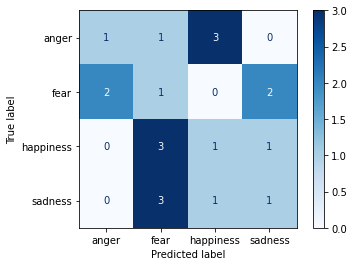

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


Y_pred = cnn.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ["anger", "fear", "happiness", "sadness"]

cm = confusion_matrix(test_set.classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()